In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
#import pandasql as psql
import pandasql as psql

In [2]:
#loading the dataset
credit_test=pd.read_csv(r"D:\Downloads\test.csv (1).zip",header=0)
credit_train=pd.read_csv(r"C:\Users\kavya\Downloads\train.csv",header=0)
credit_test_bk1=credit_test.copy()
credit_train_bk1=credit_train.copy()
credit_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
credit_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [4]:
print(credit_train.shape)
print(credit_test.shape)

(100000, 28)
(50000, 27)


In [5]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [7]:
credit_train.duplicated().any()

False

In [8]:
credit_test.duplicated().any()

False

In [9]:
#Checking for duplicated values in the dataset
credit_train_dup=credit_train[credit_train.duplicated(keep='last')]
credit_train_dup

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [10]:
#Checking for duplicated values in the dataset
credit_test_dup=credit_test[credit_test.duplicated(keep='last')]
credit_test_dup

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [11]:
credit_train.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [12]:
credit_test.nunique()

ID                          50000
Customer_ID                 12500
Month                           4
Name                        10139
Age                           976
SSN                         12501
Occupation                     16
Annual_Income               16121
Monthly_Inhand_Salary       12793
Num_Bank_Accounts             540
Num_Credit_Card               819
Interest_Rate                 945
Num_of_Loan                   263
Type_of_Loan                 6260
Delay_from_due_date            73
Num_of_Delayed_Payment        443
Changed_Credit_Limit         3927
Num_Credit_Inquiries          750
Credit_Mix                      4
Outstanding_Debt            12685
Credit_Utilization_Ratio    50000
Credit_History_Age            399
Payment_of_Min_Amount           3
Total_EMI_per_month         13144
Amount_invested_monthly     45450
Payment_Behaviour               7
Monthly_Balance             49433
dtype: int64

In [13]:
credit_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [14]:
credit_test.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [15]:
#resizing the plot
def resizeplot():
    plt.figure(figsize=(12,6))
def resizecorr():
    plt.figure(figsize=(15,7))
    

<Axes: >

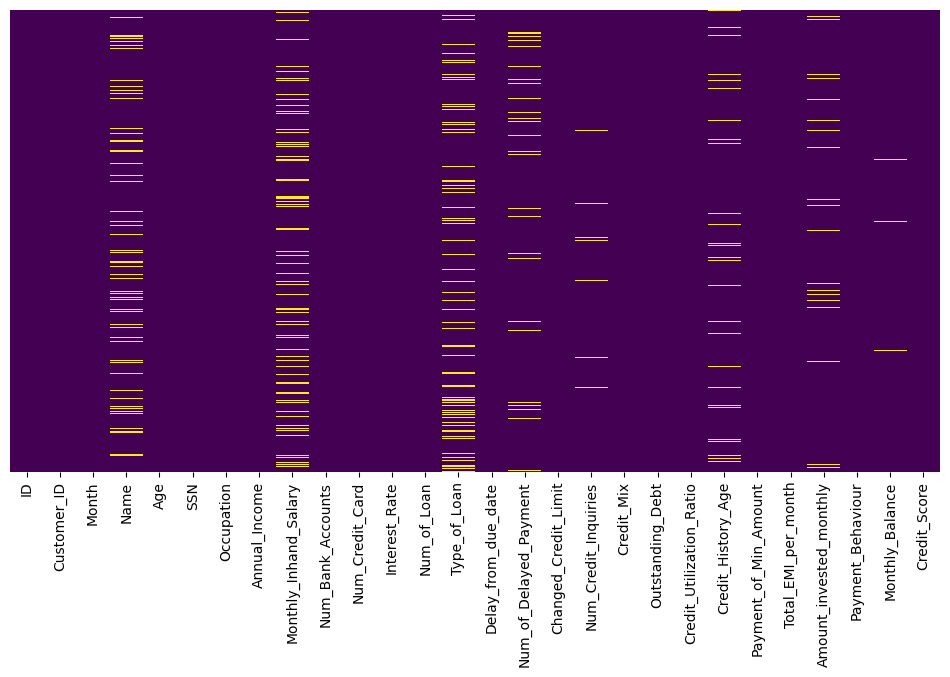

In [16]:
resizeplot()
sns.heatmap(credit_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
#using SimpleImputer to address missing values
#SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
credit_train['Name']=imp.fit_transform(credit_train[['Name']])
credit_train['Monthly_Inhand_Salary']=imp.fit_transform(credit_train[['Monthly_Inhand_Salary']])
credit_train['Type_of_Loan']=imp.fit_transform(credit_train[['Type_of_Loan']])
credit_train['Num_of_Delayed_Payment']=imp.fit_transform(credit_train[['Num_of_Delayed_Payment']])
credit_train['Num_Credit_Inquiries']=imp.fit_transform(credit_train[['Num_Credit_Inquiries']])
credit_train['Credit_History_Age']=imp.fit_transform(credit_train[['Credit_History_Age']])
credit_train['Amount_invested_monthly']=imp.fit_transform(credit_train[['Amount_invested_monthly']])
credit_train['Monthly_Balance']=imp.fit_transform(credit_train[['Monthly_Balance']])

In [18]:
credit_train.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [19]:
credit_train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<Axes: >

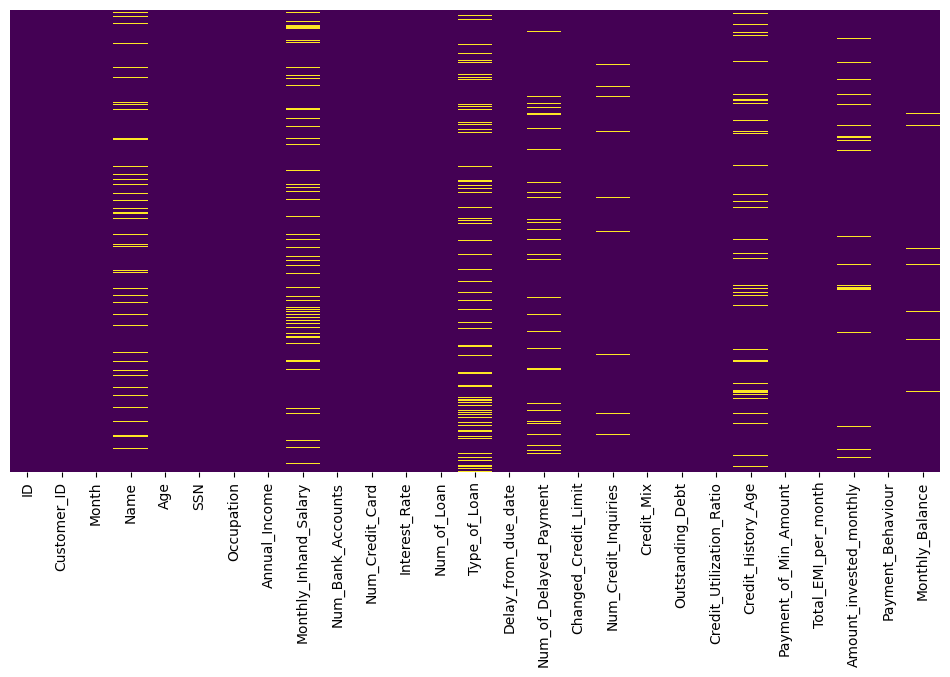

In [20]:
resizeplot()
sns.heatmap(credit_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
#using SimpleImputer to address missing values
#SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
credit_test['Name']=imp1.fit_transform(credit_test[['Name']])
credit_test['Monthly_Inhand_Salary']=imp1.fit_transform(credit_test[['Monthly_Inhand_Salary']])
credit_test['Type_of_Loan']=imp1.fit_transform(credit_test[['Type_of_Loan']])
credit_test['Num_of_Delayed_Payment']=imp1.fit_transform(credit_test[['Num_of_Delayed_Payment']])
credit_test['Num_Credit_Inquiries']=imp1.fit_transform(credit_test[['Num_Credit_Inquiries']])
credit_test['Credit_History_Age']=imp1.fit_transform(credit_test[['Credit_History_Age']])
credit_test['Amount_invested_monthly']=imp1.fit_transform(credit_test[['Amount_invested_monthly']])
credit_test['Monthly_Balance']=imp1.fit_transform(credit_test[['Monthly_Balance']])

In [22]:
del credit_train['Monthly_Balance']

In [23]:
del credit_test['Monthly_Balance']

In [24]:
credit_test.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
dtype: int64

In [25]:
credit_train.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,2295.058333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,19,11.27,4.0,Good,809.98,31.94496,15 Years and 11 Months,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,Good


In [26]:
credit_train=credit_train.drop(['ID','Customer_ID','Name','Occupation','Type_of_Loan','Credit_History_Age'],axis=1)

In [27]:
credit_test.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments


In [28]:
credit_test=credit_test.drop(['ID','Customer_ID','Name','Occupation','Type_of_Loan','Credit_History_Age'],axis=1)

In [29]:
num_vars=credit_train.columns[credit_train.dtypes!='object']
cat_vars=credit_train.columns[credit_train.dtypes=='object']
print(num_vars)
print(cat_vars)

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')
Index(['Month', 'Age', 'SSN', 'Annual_Income', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Payment_of_Min_Amount', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [30]:
#converting the values into int values by using label encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
credit_train['Month']=LE.fit_transform(credit_train[['Month']])
credit_train['Credit_Mix']=LE.fit_transform(credit_train[['Credit_Mix']])
credit_train['Payment_of_Min_Amount']=LE.fit_transform(credit_train[['Payment_of_Min_Amount']])
credit_train['Payment_Behaviour']=LE.fit_transform(credit_train[['Payment_Behaviour']])
credit_train['Credit_Score']=LE.fit_transform(credit_train[['Credit_Score']])

In [31]:
num_vars1=credit_test.columns[credit_test.dtypes!='object']
cat_vars1=credit_test.columns[credit_test.dtypes=='object']
print(num_vars1)
print(cat_vars1)

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')
Index(['Month', 'Age', 'SSN', 'Annual_Income', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Payment_of_Min_Amount', 'Amount_invested_monthly',
       'Payment_Behaviour'],
      dtype='object')


In [32]:
#converting the values into int values by using label encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
credit_test['Month']=LE.fit_transform(credit_test[['Month']])
credit_test['Credit_Mix']=LE.fit_transform(credit_test[['Credit_Mix']])
credit_test['Payment_of_Min_Amount']=LE.fit_transform(credit_test[['Payment_of_Min_Amount']])
credit_test['Payment_Behaviour']=LE.fit_transform(credit_test[['Payment_Behaviour']])

In [33]:
print(credit_train['Age'].unique())

['23' '-500' '28_' ... '4808_' '2263' '1342']


In [34]:
#replacing the special characters with ''
credit_train['Age'] = credit_train['Age'].str.replace('_', '')
credit_train['Annual_Income'] = credit_train['Annual_Income'].str.replace('_', '')
credit_train['Num_of_Loan'] = credit_train['Num_of_Loan'].str.replace('_', '')
credit_train['Num_of_Delayed_Payment'] = credit_train['Num_of_Delayed_Payment'].str.replace('_', '')
credit_train['Outstanding_Debt'] = credit_train['Outstanding_Debt'].str.replace('_', '')
credit_train['Changed_Credit_Limit'] = credit_train['Changed_Credit_Limit'].str.replace('_', '')
#credit_train['Monthly_Balance'] = credit_train['Monthly_Balance'].str.replace('_', '')
credit_train['Amount_invested_monthly'] = credit_train['Amount_invested_monthly'].str.replace('_', '')
credit_train['Changed_Credit_Limit'] = credit_train['Changed_Credit_Limit'].replace('', 0)


In [35]:
credit_train.drop('SSN', axis=1, inplace=True)

In [36]:
#converting categorical values to numerical values
credit_train['Age']=credit_train['Age'].astype(int)
credit_train['Annual_Income']=credit_train['Annual_Income'].astype(float)
credit_train['Num_of_Loan']=credit_train['Num_of_Loan'].astype(float)
credit_train['Num_of_Delayed_Payment']=credit_train['Num_of_Delayed_Payment'].astype(float)
credit_train['Outstanding_Debt']=credit_train['Outstanding_Debt'].astype(float)
credit_train['Changed_Credit_Limit']=credit_train['Changed_Credit_Limit'].astype(float)
#credit_train['Monthly_Balance']=credit_train['Monthly_Balance'].astype(float)
credit_train['Amount_invested_monthly']=credit_train['Amount_invested_monthly'].astype(float)

In [37]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  int32  
 13  Outstanding_Debt          100000 non-null  fl

In [38]:
#replacing the special characters with ''
credit_test['Age'] = credit_test['Age'].str.replace('_', '')
credit_test['Annual_Income'] = credit_test['Annual_Income'].str.replace('_', '')
credit_test['Num_of_Loan'] = credit_test['Num_of_Loan'].str.replace('_', '')
credit_test['Num_of_Delayed_Payment'] = credit_test['Num_of_Delayed_Payment'].str.replace('_', '')
credit_test['Outstanding_Debt'] = credit_test['Outstanding_Debt'].str.replace('_', '')
credit_test['Changed_Credit_Limit'] = credit_test['Changed_Credit_Limit'].str.replace('_', '')
#credit_test['Monthly_Balance'] = credit_test['Monthly_Balance'].str.replace('_', '')
credit_test['Amount_invested_monthly'] = credit_test['Amount_invested_monthly'].str.replace('_', '')
credit_test['Changed_Credit_Limit'] = credit_test['Changed_Credit_Limit'].replace('', 0)

In [39]:
credit_test.drop('SSN', axis=1, inplace=True)

In [40]:
#converting categorical values to numerical values
credit_test['Age']=credit_test['Age'].astype(int)
credit_test['Annual_Income']=credit_test['Annual_Income'].astype(float)
credit_test['Num_of_Loan']=credit_test['Num_of_Loan'].astype(float)
credit_test['Num_of_Delayed_Payment']=credit_test['Num_of_Delayed_Payment'].astype(float)
credit_test['Outstanding_Debt']=credit_test['Outstanding_Debt'].astype(float)
credit_test['Changed_Credit_Limit']=credit_test['Changed_Credit_Limit'].astype(float)
#credit_test['Monthly_Balance']=credit_test['Monthly_Balance'].astype(float)
credit_test['Amount_invested_monthly']=credit_test['Amount_invested_monthly'].astype(float)

In [41]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  int32  
 13  Outstanding_Debt          100000 non-null  fl

In [42]:
credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int32  
 1   Age                       50000 non-null  int32  
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  float64
 8   Delay_from_due_date       50000 non-null  int64  
 9   Num_of_Delayed_Payment    50000 non-null  float64
 10  Changed_Credit_Limit      50000 non-null  float64
 11  Num_Credit_Inquiries      50000 non-null  float64
 12  Credit_Mix                50000 non-null  int32  
 13  Outstanding_Debt          50000 non-null  float64
 14  Credit

In [43]:
credit_train.isnull().sum()

Month                       0
Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

In [44]:
# Identify the independent and targrt (dependent) variables
IndepVar=[]
for col in credit_train.columns:
    if col!='Credit_Score':
        IndepVar.append(col)
TargetVar='Credit_Score'
x=credit_train[IndepVar]
y=credit_train[TargetVar]

In [45]:
 # Split the data into train and test (random sampling)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#Display the shape for train and test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70000, 19), (30000, 19), (70000,), (30000,))

In [46]:
# scaling the features by using minmaxscaler
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(credit_train)


In [48]:
x_test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [49]:
x_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

# Logistic regression algorithm

In [51]:
model = LinearRegression()

# fit the model with the training data
model.fit(train_x,train_y)

# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model',model.intercept_)

# predict the target on the test dataset
predict_train = model.predict(train_x)
print('\nItem_Outlet_Sales on training data',predict_train) 

# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = model.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)

In [53]:
EMResults = pd.read_csv(r"C:\Users\kavya\Downloads\EMResults.csv")
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Logistic Regression

[[ 1694   339  1248]
 [   72  3632  2002]
 [ 3556  4834 12623]]
Print Class: 0
TP=1694, FN=1587, TN=23091, FP=3628
Accuracy: 0.826
Precision: 0.318
Sensitivity: 0.516
F1-Score: 0.394
Specificity: 0.864
Balanced Accuracy: 0.69
MCC: 0.311

Print Class: 1
TP=3632, FN=2074, TN=19121, FP=5173
Accuracy: 0.758
Precision: 0.412
Sensitivity: 0.637
F1-Score: 0.501
Specificity: 0.787
Balanced Accuracy: 0.712
MCC: 0.365

Print Class: 2
TP=12623, FN=8390, TN=5737, FP=3250
Accuracy: 0.612
Precision: 0.795
Sensitivity: 0.601
F1-Score: 0.684
Specificity: 0.638
Balanced Accuracy: 0.619
MCC: 0.219

Overall Performance Prediction:
Accuracy: 73.2%
Precision: 50.8333%
Recall or Sensitivity: 58.4667%
F1-Score: 0.5263
Specificity or True Nagative Rate: 76.3%
Balanced Accuracy: 67.3667%

MCC: 0.2983

roc_auc_score: 0.759


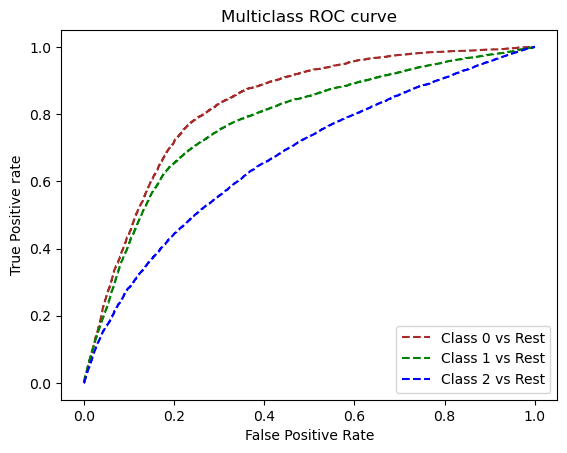

In [54]:
#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

credit_train = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

credit_train = credit_train.fit(x_train,y_train)

# Predict the model with test data set

y_pred = credit_train.predict(x_test)
y_pred_prob = credit_train.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
'''plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')'''

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------


# ExtraTreesClassifier

[[ 3522    85  1715]
 [  521  5991  2293]
 [ 1853  2019 12001]]
Print Class: 0
TP=3522, FN=2374, TN=22304, FP=1800
Accuracy: 0.861
Precision: 0.662
Sensitivity: 0.597
F1-Score: 0.628
Specificity: 0.925
Balanced Accuracy: 0.761
MCC: 0.544

Print Class: 1
TP=5991, FN=2104, TN=19091, FP=2814
Accuracy: 0.836
Precision: 0.68
Sensitivity: 0.74
F1-Score: 0.709
Specificity: 0.872
Balanced Accuracy: 0.806
MCC: 0.596

Print Class: 2
TP=12001, FN=4008, TN=10119, FP=3872
Accuracy: 0.737
Precision: 0.756
Sensitivity: 0.75
F1-Score: 0.753
Specificity: 0.723
Balanced Accuracy: 0.736
MCC: 0.473

Overall Performance Prediction:
Accuracy: 81.1333%
Precision: 69.9333%
Recall or Sensitivity: 69.5667%
F1-Score: 0.6967
Specificity or True Negative Rate: 84.0%
Balanced Accuracy: 76.7667%

MCC: 0.5377

roc_auc_score: 0.861


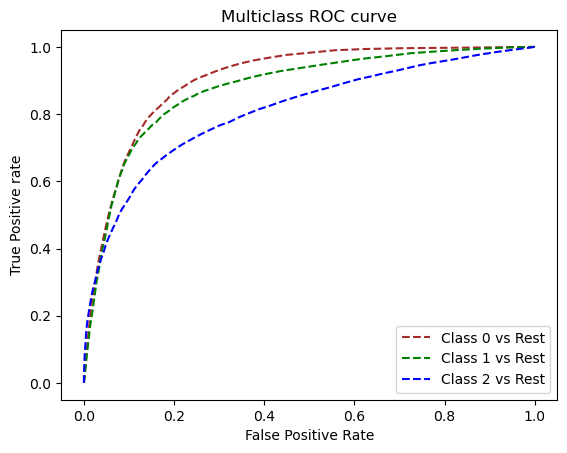

In [55]:
# Importing the Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# Create an object for the model
credit_train = ExtraTreesClassifier(random_state=0)

# Train the model with the training data
credit_train = credit_train.fit(x_train, y_train)

# Predict the model with the test data set
y_pred = credit_train.predict(x_test)
y_pred_prob = credit_train.predict_proba(x_test)

# confusion matrix in sklearn
print(confusion_matrix(y_test, y_pred))  # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes
lst_actual_class = y_test.values
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12
lst_classes = [0, 1, 2]
# ... (previous code remains the same)

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results
model_acc = []
model_recall = []
model_prec = []
model_fscore = []
model_spec = []
model_bal_acc = []
model_mcc = []

for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class]
    print("Print Class: {0}".format(no_class))

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)

    precision = round(tp / (tp + fp), 3)
    f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    model_acc.append(accuracy)
    model_prec.append(precision)
    model_recall.append(sensitivity)
    model_fscore.append(f1Score)
    model_spec.append(specificity)
    model_bal_acc.append(balanced_accuracy)
    model_mcc.append(MCC)

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp))
    print("Accuracy: {0}".format(accuracy))  # Accuracy score
    print("Precision: {0}".format(precision))  # Precision score
    print("Sensitivity: {0}".format(sensitivity))  # Recall score
    print("F1-Score: {0}".format(f1Score))  # F1 score
    print("Specificity: {0}".format(specificity))  # True Negative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy))  # Balance accuracy score
    print("MCC: {0}\n".format(MCC))  # Matthews Correlation Coefficient

# ... (rest of the code remains the same)


# OVERALL - FINAL PREDICTION PERFORMANCE
# importing mean()
from statistics import mean

print("Overall Performance Prediction:")
print("Accuracy: {0}%".format(round(mean(model_acc) * 100, 4)))
print("Precision: {0}%".format(round(mean(model_prec) * 100, 4)))
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall) * 100, 4)))
print("F1-Score: {0}".format(round(mean(model_fscore), 4)))
print("Specificity or True Negative Rate: {0}%".format(round(mean(model_spec) * 100, 4)))
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc) * 100, 4)))
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ... (previous code remains the same)

# ROC curve for Multi classes
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for each class separately
y_pred_prob_class_0 = lst_predicted_prob_class[:, 0]
y_pred_prob_class_1 = lst_predicted_prob_class[:, 1]
y_pred_prob_class_2 = lst_predicted_prob_class[:, 2]

# Calculate ROC curve and AUC score for each class
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(lst_actual_class, y_pred_prob_class_0, pos_label=0)
fpr[1], tpr[1], thresh[1] = roc_curve(lst_actual_class, y_pred_prob_class_1, pos_label=1)
fpr[2], tpr[2], thresh[2] = roc_curve(lst_actual_class, y_pred_prob_class_2, pos_label=2)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--', color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.
roc_auc_avg = roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', average='weighted')
print('roc_auc_score:', round(roc_auc_avg, 3))

# ... (rest of the code remains the same)


# Random Forest Algorithm

[[ 3670    76  1576]
 [  311  6666  1828]
 [ 1364  1951 12558]]
Print Class: 0
TP=3670, FN=1675, TN=23003, FP=1652
Accuracy: 0.889
Precision: 0.69
Sensitivity: 0.687
F1-Score: 0.688
Specificity: 0.933
Balanced Accuracy: 0.81
MCC: 0.621

Print Class: 1
TP=6666, FN=2027, TN=19168, FP=2139
Accuracy: 0.861
Precision: 0.757
Sensitivity: 0.767
F1-Score: 0.762
Specificity: 0.9
Balanced Accuracy: 0.834
MCC: 0.664

Print Class: 2
TP=12558, FN=3404, TN=10723, FP=3315
Accuracy: 0.776
Precision: 0.791
Sensitivity: 0.787
F1-Score: 0.789
Specificity: 0.764
Balanced Accuracy: 0.776
MCC: 0.55

Overall Performance Prediction:
Accuracy: 84.2%
Precision: 74.6%
Recall or Sensitivity: 74.7%
F1-Score: 0.7463
Specificity or True Negative Rate: 86.5667%
Balanced Accuracy: 80.6667%

MCC: 0.6117

roc_auc_score: 0.877


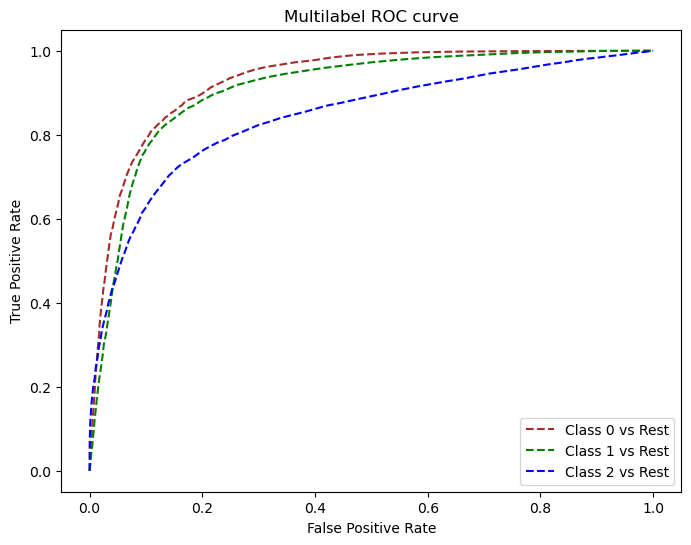

In [56]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create an object for the model
credit_train = RandomForestClassifier(random_state=0)

# Train the model with the training data
credit_train = credit_train.fit(x_train, y_train)

# Predict the model with the test data set
y_pred = credit_train.predict(x_test)
y_pred_prob = credit_train.predict_proba(x_test)

# confusion matrix in sklearn
print(confusion_matrix(y_test, y_pred))  # Vertical is actual values & horizontal is predicted values

# Convert y_test to a list of single-item lists
y_test_list = [[label] for label in y_test]

# Convert y_test_list to a 2D array with one-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_test_one_hot = mlb.fit_transform(y_test_list)

# Actual and predicted classes
lst_actual_class = y_test.values
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12
lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results
model_acc = []
model_recall = []
model_prec = []
model_fscore = []
model_spec = []
model_bal_acc = []
model_mcc = []

for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class]
    print("Print Class: {0}".format(no_class))

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)

    precision = round(tp / (tp + fp), 3)
    f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    model_acc.append(accuracy)
    model_prec.append(precision)
    model_recall.append(sensitivity)
    model_fscore.append(f1Score)
    model_spec.append(specificity)
    model_bal_acc.append(balanced_accuracy)
    model_mcc.append(MCC)

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp))
    print("Accuracy: {0}".format(accuracy))  # Accuracy score
    print("Precision: {0}".format(precision))  # Precision score
    print("Sensitivity: {0}".format(sensitivity))  # Recall score
    print("F1-Score: {0}".format(f1Score))  # F1 score
    print("Specificity: {0}".format(specificity))  # True Negative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy))  # Balance accuracy score
    print("MCC: {0}\n".format(MCC))  # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE
# importing mean()
from statistics import mean

print("Overall Performance Prediction:")
print("Accuracy: {0}%".format(round(mean(model_acc) * 100, 4)))
print("Precision: {0}%".format(round(mean(model_prec) * 100, 4)))
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall) * 100, 4)))
print("F1-Score: {0}".format(round(mean(model_fscore), 4)))
print("Specificity or True Negative Rate: {0}%".format(round(mean(model_spec) * 100, 4)))
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc) * 100, 4)))
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi-label classes
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh = {}
n_classes = len(lst_classes)

for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_one_hot[:, i], lst_predicted_prob_class[:, i])
    
# plotting
plt.figure(figsize=(8, 6))
colors = ['brown', 'green', 'blue']  # Add more colors if needed for additional classes
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i], label='Class {} vs Rest'.format(lst_classes[i]))

plt.title('Multilabel ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

# ROC AUC score - We'll compute the average ROC AUC score across all classes
roc_auc = roc_auc_score(y_test_one_hot, lst_predicted_prob_class, average='weighted')
print('roc_auc_score:', round(roc_auc, 3))

# DECISIONTREE CLASSIFIER :

[[ 2947   398  1977]
 [  435  5368  3002]
 [ 1963  2826 11084]]
Print Class: 0
TP=2947, FN=2398, TN=22280, FP=2375
Accuracy: 0.841
Precision: 0.554
Sensitivity: 0.551
F1-Score: 0.553
Specificity: 0.904
Balanced Accuracy: 0.728
MCC: 0.456

Print Class: 1
TP=5368, FN=3224, TN=17971, FP=3437
Accuracy: 0.778
Precision: 0.61
Sensitivity: 0.625
F1-Score: 0.617
Specificity: 0.839
Balanced Accuracy: 0.732
MCC: 0.461

Print Class: 2
TP=11084, FN=4979, TN=9148, FP=4789
Accuracy: 0.674
Precision: 0.698
Sensitivity: 0.69
F1-Score: 0.694
Specificity: 0.656
Balanced Accuracy: 0.673
MCC: 0.346

Overall Performance Prediction:
Accuracy: 76.4333%
Precision: 62.0667%
Recall or Sensitivity: 62.2%
F1-Score: 0.6213
Specificity or True Nagative Rate: 79.9667%
Balanced Accuracy: 71.1%

MCC: 0.421

roc_auc_score: 0.699


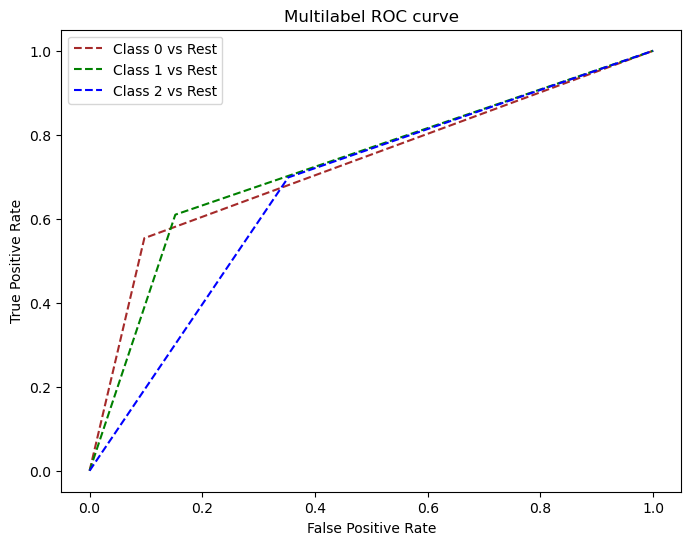

In [57]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, classification_report, roc_curve, roc_auc_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# Create an object for the DecisionTreeClassifier
credit_train = DecisionTreeClassifier(random_state=0)

# Train the model with training data
credit_train = credit_train.fit(x_train, y_train)

# Predict the model with test data set
y_pred = credit_train.predict(x_test)
y_pred_prob = credit_train.predict_proba(x_test)

# confusion matrix in sklearn
print(confusion_matrix(y_test, y_pred))  # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes
lst_actual_class = y_test

# Convert y_test to a list of single-item lists
y_test_list = [[label] for label in y_test]

# Convert y_test_list to a 2D array with one-hot encoding
mlb = MultiLabelBinarizer()
y_test_one_hot = mlb.fit_transform(y_test_list)

# Class = Label 0-2
lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, y_pred, labels=lst_classes)

# Temp store results
model_acc = []
model_recall = []
model_prec = []
model_fscore = []
model_spec = []
model_bal_acc = []
model_mcc = []

for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class]
    print("Print Class: {0}".format(no_class))

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)

    precision = round(tp / (tp + fp), 3)
    f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    model_acc.append(accuracy)
    model_prec.append(precision)
    model_recall.append(sensitivity)
    model_fscore.append(f1Score)
    model_spec.append(specificity)
    model_bal_acc.append(balanced_accuracy)
    model_mcc.append(MCC)

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp))
    print("Accuracy: {0}".format(accuracy))  # Accuracy score
    print("Precision: {0}".format(precision))  # Precision score
    print("Sensitivity: {0}".format(sensitivity))  # Recall score
    print("F1-Score: {0}".format(f1Score))  # F1 score
    print("Specificity: {0}".format(specificity))  # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy))  # Balance accuracy score
    print("MCC: {0}\n".format(MCC))  # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE
# importing mean()
from statistics import mean

print("Overall Performance Prediction:")
print("Accuracy: {0}%".format(round(mean(model_acc) * 100, 4)))
print("Precision: {0}%".format(round(mean(model_prec) * 100, 4)))
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall) * 100, 4)))
print("F1-Score: {0}".format(round(mean(model_fscore), 4)))
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec) * 100, 4)))
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc) * 100, 4)))
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes
fpr = {}
tpr = {}
thresh = {}
n_classes = len(lst_classes)

for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])

# plotting
plt.figure(figsize=(8, 6))
colors = ['brown', 'green', 'blue', 'red', 'purple', 'yellow', 'cyan', 'magenta', 'black', 'gray', 'orange', 'pink', 'lime']  # Add more colors if needed for additional classes
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i], label='Class {} vs Rest'.format(lst_classes[i]))

plt.title('Multilabel ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

# ROC AUC score - We'll compute the average ROC AUC score across all classes
roc_auc = roc_auc_score(y_test_one_hot, y_pred_prob, average='weighted')
print('roc_auc_score:', round(roc_auc, 3))


# KNN algorithm :

In [58]:
# Load the result dataset for KNN

KNN_Results = pd.read_csv(r"C:\Users\kavya\Downloads\KNN_Results.csv",header=0)
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


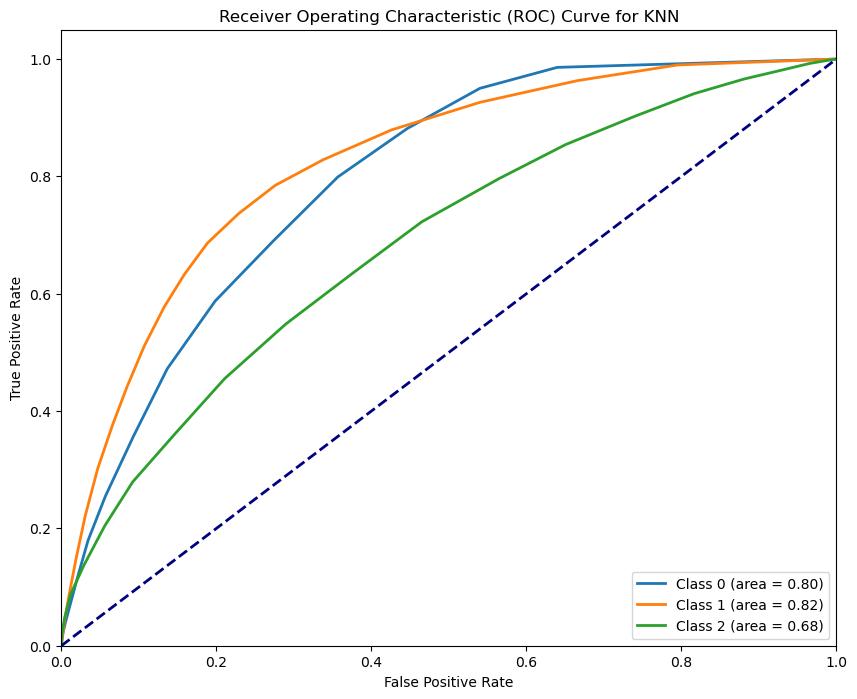

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming you have your features in the DataFrame 'data' and the target in 'target'
# Split the data into training and testing sets (80% train, 20% test)
# Split the data into train and test (random sampling)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Display the shape for train and test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

# Initialize an empty DataFrame to store KNN results
KNN_Results = pd.DataFrame()

# Loop over different values of k
for k in range(1, 21):
   # Build the model
    ModelKNN = KNeighborsClassifier(n_neighbors=k)

# Train the model
ModelKNN.fit(x_train, y_train)

# Predict the model
y_pred = ModelKNN.predict(x_test)
y_pred_prob = ModelKNN.predict_proba(x_test)

# Assuming you have your features in the DataFrame 'data' and the target in 'target'
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the model
ModelKNN = KNeighborsClassifier(n_neighbors=k)

# Train the model
ModelKNN.fit(x_train, y_train)

# Predict the model
y_pred = ModelKNN.predict(x_test)
y_pred_prob = ModelKNN.predict_proba(x_test)

# Get the number of classes in the target
num_classes = len(np.unique(y))

# Area under ROC curve (For multi-class classification using one-vs-rest strategy)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for class_idx in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test == class_idx, y_pred_prob[:, class_idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_idx} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

#defining

from sklearn.metrics import accuracy_score

# Calculate overall accuracy
accuracy_val = accuracy_score(y_test, y_pred)

# Append the results to the DataFrame
new_row = {
        'Model Name': str(ModelKNN),
        'KNN K Value': k,
        'True_Positive': tp,
        'False_Negative': fn,
        'False_Positive': fp,
        'True_Negative': tn,
        'Accuracy': accuracy_val,
        'Precision': precision,
        'Recall': sensitivity,
        'F1 Score': f1Score,
        'Specificity': specificity,
        'MCC': MCC,
        'ROC_AUC_Score': roc_auc,
        'Balanced Accuracy': balanced_accuracy
    }
KNN_Results = KNN_Results.append(new_row, ignore_index=True)


# NaiveBayes Model (gaussianNB) Algorithm :

# Gaussian Naive Bayes Classifier:

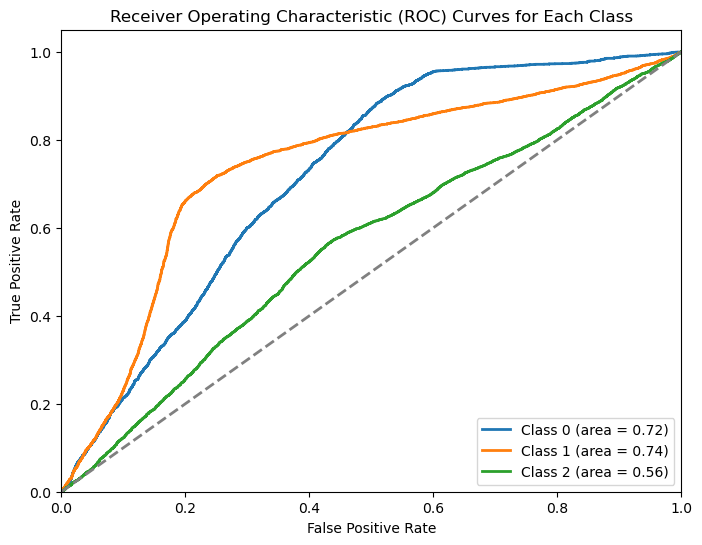

roc_auc_score: 0.558


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your features in the DataFrame 'data' and the target in 'target'
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an object for the Gaussian Naive Bayes Classifier
credit_train = GaussianNB()

# Train the model with training data
credit_train.fit(x_train, y_train)

# Predict the model with the test data set
y_pred_prob = credit_train.predict_proba(x_test)

# Compute ROC curve and ROC AUC score for each class
plt.figure(figsize=(8, 6))
for class_idx in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test == class_idx, y_pred_prob[:, class_idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_idx} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

# Print the average ROC AUC score
print('roc_auc_score:', round(roc_auc, 3))
